In [1]:
import numpy as np
import struct
import os
import matplotlib.pyplot as plt
import seaborn as sns

from data_process import load_mnist, load_data
from data_process import data_convert
from train import train
from evaluate import predict, cal_accuracy
from softmax_regression import softmax_regression

In [2]:
mnist_dir = "./mnist_data/"
train_data_dir = "train-images.idx3-ubyte"
train_label_dir = "train-labels.idx1-ubyte"
test_data_dir = "t10k-images.idx3-ubyte"
test_label_dir = "t10k-labels.idx1-ubyte"
k = 10
iters = 1000
alpha = 0.75

In [3]:
train_images, train_labels, test_images, test_labels = load_data(mnist_dir, train_data_dir, train_label_dir, test_data_dir, test_label_dir)
print("Got data. ") 

Loading MNIST data from files...
./mnist_data/train-images.idx3-ubyte
Load images from ./mnist_data/train-images.idx3-ubyte, number: 60000, data shape: (60000, 784)
Load images from ./mnist_data/train-labels.idx1-ubyte, number: 60000, data shape: (60000, 1)
Load images from ./mnist_data/t10k-images.idx3-ubyte, number: 10000, data shape: (10000, 784)
Load images from ./mnist_data/t10k-labels.idx1-ubyte, number: 10000, data shape: (10000, 1)
Got data. 


In [4]:
train_set = train_images.astype(float)

In [6]:
iters = 1500

In [7]:
loss,theta = train(train_set, train_labels, k, iters, alpha)

100%|██████████| 1500/1500 [02:22<00:00, 10.50it/s]


In [10]:
y_predict = predict(test_images, theta)
accuracy  = cal_accuracy(y_predict, test_labels)
print("accuracy: {:.2%}".format(accuracy))

accuracy: 93.57%


In [15]:
test_set = test_images
test_set[test_set<=100] = 0
test_set[test_set>100] = 1
y_predict = predict(test_set, theta)
accuracy  = cal_accuracy(y_predict, test_labels)
print("accuracy: {:.2%}".format(accuracy))

accuracy: 9.80%


<Axes: >

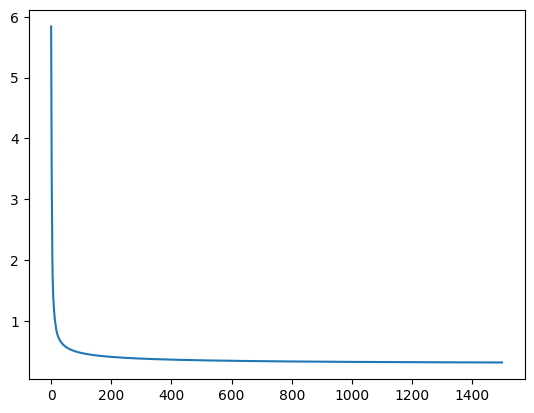

In [11]:
sns.lineplot(loss)

<Axes: >

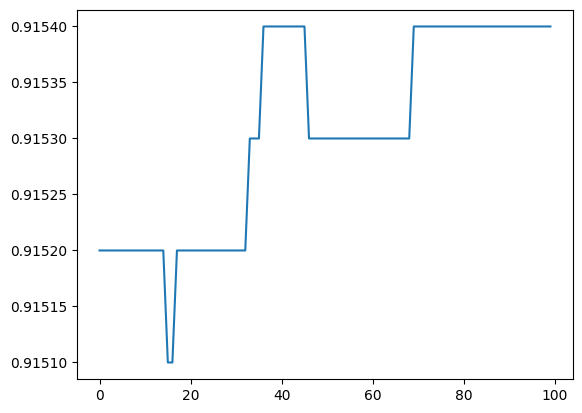

In [17]:
sns.lineplot(acc[-100:])

In [12]:
loss[-1]

0.3126192299941434